# DM2022 ISA5810 Lab2 Homework Competition - Bert

## Install Packages

In [1]:
!pip install -q transformers
!pip install -q datasets

In [2]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116


In [3]:
!pip3 install seaborn

In [4]:
!pip3 install -U scikit-learn

In [5]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/home/allenyl/.py_env/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
device

device(type='cuda')

In [9]:
!pwd

/home/allenyl/projects/DM2022-Lab2-Homework/Kaggle


## Loading tables

### Loading identification table

In [10]:
import pandas as pd

In [11]:
data_identification = pd.read_csv("../Kaggle/data/data_identification.csv")

In [12]:
data_identification

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


### Loading emotion table

In [13]:
emotion = pd.read_csv("../Kaggle/data/emotion.csv")

In [14]:
emotion

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


### Loading twitter table

In [15]:
import json 

twitter_data = []
with open('../Kaggle/data/tweets_DM.json') as f:
    for line in f.readlines():
        data = json.loads(line)
        twitter_data.append(data['_source']['tweet'])

In [16]:
twitter_data

[{'hashtags': ['Snapchat'],
  'tweet_id': '0x376b20',
  'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'},
 {'hashtags': ['freepress', 'TrumpLegacy', 'CNN'],
  'tweet_id': '0x2d5350',
  'text': '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN'},
 {'hashtags': ['bibleverse'],
  'tweet_id': '0x28b412',
  'text': 'Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH>'},
 {'hashtags': [],
  'tweet_id': '0x1cd5b0',
  'text': 'Now ISSA is stalking Tasha 😂😂😂 <LH>'},
 {'hashtags': [],
  'tweet_id': '0x2de201',
  'text': '"Trust is not the same as faith. A friend is someone you trust. Putting faith in anyone is a mistake." ~ Christopher Hitchens <LH> <LH>'},
 {'hashtags': ['authentic', 'LaughOutLoud'],
  'tweet_id': '0x1d755c',
  'text': '@RISKshow @TheKevinAllison Thx for the BEST TIME tonight. What stories! H

In [17]:
df_twitter = pd.DataFrame(twitter_data)

In [18]:
df_twitter

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


### Join all tables

In [19]:
df_temp = df_twitter.join(data_identification.set_index('tweet_id'), on='tweet_id')
df_all = df_temp.join(emotion.set_index('tweet_id'), on='tweet_id')

In [20]:
df_all

,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN
...,...,...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,NaN
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,test,NaN
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,test,NaN
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",train,joy


## Spliting dataset

### Spliting Train and Test set

In [21]:
df_train_tmp = df_all[df_all['identification'] == 'train']
df_test = df_all[df_all['identification'] == 'test']

In [22]:
df_train_tmp

,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation
...,...,...,...,...,...
1867526,"[NoWonder, Happy]",0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,train,joy
1867527,[],0x38959e,In every circumtance I'd like to be thankful t...,train,joy
1867528,[blessyou],0x2cbca6,there's currently two girls walking around the...,train,joy
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",train,joy


In [23]:
df_test

,hashtags,tweet_id,text,identification,emotion
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test,NaN
30,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test,NaN
33,[],0x26289a,"In these tough times, who do YOU turn to as yo...",test,NaN
...,...,...,...,...,...
1867525,[],0x2913b4,"""For this is the message that ye heard from th...",test,NaN
1867529,[],0x2a980e,"""There is a lad here, which hath five barley l...",test,NaN
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,NaN
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,test,NaN


### Spliting Train and Validation set

In [24]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df_train_tmp, test_size=0.01, random_state=42)

In [25]:
df_train

,hashtags,tweet_id,text,identification,emotion
1288973,"[WordsMyPastorToldMe, TheWell]",0x24bb50,"You must be ready to say ""I am tired of leavin...",train,anticipation
1140048,"[GOP, America, GIFT]",0x2455ce,@nytopinion @fckdonaldjtrump #GOP have <LH> #A...,train,sadness
384476,[],0x349b15,Bilingually educated through <LH> from <LH>,train,anticipation
907258,[],0x2769ba,@cpatobrien No I tweeted it after you sent it ...,train,joy
1413582,"[qualitative, research, workshop, credible, tr...",0x3627ab,@zarlashtah and I <LH> to discuss all things #...,train,anticipation
...,...,...,...,...,...
332048,[],0x1d5c9e,"And above all these things put on charity, whi...",train,joy
1814818,[],0x2cc602,@kylegriffin1 Still a devastating poll for Tru...,train,sadness
168809,[],0x2ec9a9,"@BebeNeuwirth Ohhh, tears! <LH>",train,joy
861169,[],0x2d3f18,Sponsor shirts are completed and Spirit Gear h...,train,joy


In [26]:
df_val

,hashtags,tweet_id,text,identification,emotion
1245305,"[week, since, Mom, miss, She, willbe, BestFrie...",0x2b605f,Been a #week now #since I <LH> my #Mom. I #mis...,train,surprise
1470116,[],0x2eaf42,"Follow our Librarian, Ms. Bird 🐦 for more info...",train,joy
600175,[],0x333365,Wonder if the guys who skate in Foxboro over t...,train,joy
1218751,[],0x28af74,"@vanillablack1 Bloody <LH> puts it mildly, wil...",train,joy
1260993,[],0x3868ce,Beat the Dolphins next week and we are back to...,train,joy
...,...,...,...,...,...
1800085,"[GivingThanks, GoHawks]",0x23164e,I give thanks for each & every one of you. <L...,train,trust
42940,"[Yankees, mlb]",0x351f55,"Are the #Yankees radio announcers, married hus...",train,disgust
1689635,[],0x3305f7,@amithdenzi @nytimesworld More than 100 childr...,train,disgust
278635,[],0x352c72,Found my lost sorbet voucher <LH>,train,joy


### Save dataframe for later use

In [27]:
## save to pickle file
df_train.to_pickle("df_train.pkl")
df_val.to_pickle("df_val.pkl")
df_test.to_pickle("df_test.pkl")

### Loading saved dataframe

In [20]:
import pandas as pd

## load a pickle file
df_train = pd.read_pickle("df_train.pkl")
df_val = pd.read_pickle("df_val.pkl")
df_test = pd.read_pickle("df_test.pkl")

In [21]:
df_train

,hashtags,tweet_id,text,identification,emotion
1288973,"[WordsMyPastorToldMe, TheWell]",0x24bb50,"You must be ready to say ""I am tired of leavin...",train,anticipation
1140048,"[GOP, America, GIFT]",0x2455ce,@nytopinion @fckdonaldjtrump #GOP have <LH> #A...,train,sadness
384476,[],0x349b15,Bilingually educated through <LH> from <LH>,train,anticipation
907258,[],0x2769ba,@cpatobrien No I tweeted it after you sent it ...,train,joy
1413582,"[qualitative, research, workshop, credible, tr...",0x3627ab,@zarlashtah and I <LH> to discuss all things #...,train,anticipation
...,...,...,...,...,...
332048,[],0x1d5c9e,"And above all these things put on charity, whi...",train,joy
1814818,[],0x2cc602,@kylegriffin1 Still a devastating poll for Tru...,train,sadness
168809,[],0x2ec9a9,"@BebeNeuwirth Ohhh, tears! <LH>",train,joy
861169,[],0x2d3f18,Sponsor shirts are completed and Spirit Gear h...,train,joy


In [22]:
df_test

,hashtags,tweet_id,text,identification,emotion
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test,NaN
30,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test,NaN
33,[],0x26289a,"In these tough times, who do YOU turn to as yo...",test,NaN
...,...,...,...,...,...
1867525,[],0x2913b4,"""For this is the message that ye heard from th...",test,NaN
1867529,[],0x2a980e,"""There is a lad here, which hath five barley l...",test,NaN
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,NaN
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,test,NaN


## Data Preprocessing

In [23]:
from datasets import Dataset, DatasetDict

train_ds = Dataset.from_pandas(df_train)
val_ds = Dataset.from_pandas(df_val)
test_ds = Dataset.from_pandas(df_test)

ds = DatasetDict()

ds['train'] = train_ds
ds['validation'] = val_ds
ds['test'] = test_ds

In [24]:
ds

DatasetDict({
    train: Dataset({
        features: ['hashtags', 'tweet_id', 'text', 'identification', 'emotion', '__index_level_0__'],
        num_rows: 1441007
    })
    validation: Dataset({
        features: ['hashtags', 'tweet_id', 'text', 'identification', 'emotion', '__index_level_0__'],
        num_rows: 14556
    })
    test: Dataset({
        features: ['hashtags', 'tweet_id', 'text', 'identification', 'emotion', '__index_level_0__'],
        num_rows: 411972
    })
})

In [25]:
from datasets import ClassLabel
my_tags = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
ClassLabels = ClassLabel(num_classes=len(my_tags), names=my_tags)

ClassLabels

ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None)

In [26]:
# Mapping Labels to IDs
def map_emotion2id(batch):
    batch['label'] = [ClassLabels.str2int(label) if label is not None else None for label in batch['emotion']]
    return batch

ds = ds.map(map_emotion2id, batched=True)
ds = ds.cast_column('label', ClassLabels)

Casting the dataset: 100%|██████████| 42/42 [00:01<00:00, 22.20ba/s]


In [27]:
ds['train'].features

{'hashtags': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'tweet_id': Value(dtype='string', id=None),
 'text': Value(dtype='string', id=None),
 'identification': Value(dtype='string', id=None),
 'emotion': Value(dtype='string', id=None),
 '__index_level_0__': Value(dtype='int64', id=None),
 'label': ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None)}

In [28]:
ds = ds.remove_columns(["hashtags", "identification", "emotion", "__index_level_0__"])

In [29]:
ds['train'].features

{'tweet_id': Value(dtype='string', id=None),
 'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None)}

In [30]:
ds

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'text', 'label'],
        num_rows: 1441007
    })
    validation: Dataset({
        features: ['tweet_id', 'text', 'label'],
        num_rows: 14556
    })
    test: Dataset({
        features: ['tweet_id', 'text', 'label'],
        num_rows: 411972
    })
})

In [31]:
from itertools import islice

for text,label in islice(zip(ds['train']['text'], ds['train']['label']), 20):
    print(str(label) + '\t' + text)

1	You must be ready to say "I am tired of leaving life as a help" Luke 22. #WordsMyPastorToldMe <LH> <LH> <LH> #TheWell
4	@nytopinion @fckdonaldjtrump #GOP have <LH> #America and its people tonight in this #GIFT to the 1% and Corporations
1	Bilingually educated through <LH> from <LH>
7	@cpatobrien No I tweeted it after you sent it so thanks for the <LH>
1	@zarlashtah and I <LH> to discuss all things #qualitative #research @canuxconf #workshop! #credible #transparent for #success
3	Like, what a good sentence. <LH>
4	Discovered a new @StarbucksUK ☕️near Dumfries, really shouldn't have been excited <LH> by a manager who has no smile/clue! ☹️😒
6	HUGE WIN!!!! @GKCogsFootball <LH> #gkcogs
7	Closed Buy 1.4 Lots EURUSD 1.19004 for +13.6 pips, total for today +1076.6 pips <LH> <LH> <LH> <LH> <LH>
3	@Chris_Attalus That looks incredible Chris! <LH>
4	@MiamiHerald and here we are without even enough cash to buy a sandwich after the storm <LH> @MiamiHEAT
0	Just lost 20 Bucks due to a super slow tra

### Tokenize

In [32]:
from transformers import AutoTokenizer

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize(batch):
    return tokenizer(batch["text"], truncation=True)

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /home/allenyl/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/re

In [33]:
ds_encoded = ds.map(tokenize, batched=True, batch_size=1000)

100%|██████████| 412/412 [00:08<00:00, 47.37ba/s]


In [34]:
ds_encoded["train"].features

{'tweet_id': Value(dtype='string', id=None),
 'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

In [35]:
ds_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
ds_encoded["train"].features

{'tweet_id': Value(dtype='string', id=None),
 'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

### Save processed dataset

In [36]:
ds_encoded.save_to_disk("ds_encoded.hf")

### Loading processed dataset

In [1]:
from datasets import ClassLabel
my_tags = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
ClassLabels = ClassLabel(num_classes=len(my_tags), names=my_tags)

ClassLabels

/home/allenyl/.py_env/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None)

In [2]:
from datasets import load_from_disk
  
ds_encoded = load_from_disk("./ds_encoded.hf")

In [3]:
ds_encoded

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1441007
    })
    validation: Dataset({
        features: ['tweet_id', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 14556
    })
    test: Dataset({
        features: ['tweet_id', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 411972
    })
})

### remove unnecssary columns

In [4]:
ds_encoded['train'] = ds_encoded['train'].remove_columns(["tweet_id"])
ds_encoded['validation'] = ds_encoded['validation'].remove_columns(["tweet_id"])

In [5]:
ds_encoded["test"] = ds_encoded["test"].remove_columns(["label"])

#### show label and length

In [6]:
from itertools import islice

for input_ids,label in islice(zip(ds_encoded['train']['input_ids'], ds_encoded['train']['label']), 20):
    print(str(label), len(input_ids))

1 44
4 39
1 15
7 25
1 39
3 13
4 36
6 24
7 53
3 17
4 29
0 31
7 52
3 19
7 39
2 21
3 20
7 41
4 21
5 18


## Model Training

In [7]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
device

device(type='cuda')

In [9]:
from transformers import AutoTokenizer

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [10]:
from transformers import AutoModelForSequenceClassification
num_labels = len(my_tags)
model = (AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels).to(device))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [11]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [14]:
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding

batch_size = 64
logging_steps = len(ds_encoded["train"]) // batch_size
training_args = TrainingArguments(output_dir="results",
                                  num_train_epochs=8,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  load_best_model_at_end=True,
                                  metric_for_best_model="f1",
                                  weight_decay=0.01,
                                  evaluation_strategy="steps",
                                  save_strategy="steps",
                                  eval_steps=200,
                                  save_steps=1000,
                                  save_total_limit = 5,
                                  group_by_length=True,
                                  disable_tqdm=False)

In [15]:
from transformers import Trainer

data_collocator = DataCollatorWithPadding(tokenizer)

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  data_collator=data_collocator,
                  train_dataset=ds_encoded["train"],
                  eval_dataset=ds_encoded["validation"])
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/home/allenyl/.py_env/lib/python3.6/site-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1441007
  Num Epochs = 8
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 128
  Gradient Accumulation steps = 1
  Total optimization steps = 90064
/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were sca

Step,Training Loss,Validation Loss,Accuracy,F1
200,No log,1.401213,0.501374,0.456533
400,No log,1.296325,0.542732,0.515949
600,1.451900,1.219306,0.565952,0.542780
800,1.451900,1.174785,0.576257,0.558230
1000,1.209500,1.143983,0.592608,0.573761
1200,1.209500,1.115014,0.600783,0.580980
1400,1.209500,1.108892,0.603943,0.584865
1600,1.142000,1.097497,0.607516,0.594603
1800,1.142000,1.077019,0.610401,0.590756
2000,1.103100,1.079437,0.608065,0.599333


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
/home/allenyl/.py_env/lib/python3.6/site-packages/torc

  Batch size = 64
/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
The following columns in the evaluation set  don't have a corresponding argument in

The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
/home/allenyl/.py_env/lib/python3.6/site-packages/torc

  Batch size = 64
/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
/home/allenyl/.py_env/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
The following columns in the evaluation set  don't have a corresponding argument in

KeyboardInterrupt: 

### Save trained model

In [16]:
model.save_pretrained('./model')
tokenizer.save_pretrained('./model')

Configuration saved in ./model/config.json
Model weights saved in ./model/pytorch_model.bin
tokenizer config file saved in ./model/tokenizer_config.json
Special tokens file saved in ./model/special_tokens_map.json


('./model/tokenizer_config.json',
 './model/special_tokens_map.json',
 './model/vocab.txt',
 './model/added_tokens.json',
 './model/tokenizer.json')

### Free GPU memory

In [15]:
del model
del tokenizer

In [16]:
torch.cuda.empty_cache()

In [17]:
torch.cuda.memory_allocated()

0

### Loading Saved model

In [7]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
device

device(type='cuda')

In [9]:
from transformers import AutoModelForSequenceClassification
num_labels = len(my_tags)
model = (AutoModelForSequenceClassification.from_pretrained('./model').to(device))

In [10]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('./model')

In [11]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [12]:
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding

batch_size = 64
logging_steps = len(ds_encoded["train"]) // batch_size
training_args = TrainingArguments(output_dir="results",
                                  num_train_epochs=8,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  load_best_model_at_end=True,
                                  metric_for_best_model="f1",
                                  weight_decay=0.01,
                                  evaluation_strategy="steps",
                                  save_strategy="steps",
                                  eval_steps=100,
                                  save_steps=1000,
                                  save_total_limit = 5,
                                  group_by_length=True,
                                  disable_tqdm=False)

In [13]:
from transformers import Trainer

data_collocator = DataCollatorWithPadding(tokenizer)

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  data_collator=data_collocator,
                  train_dataset=ds_encoded["train"],
                  eval_dataset=ds_encoded["validation"])

## Evaluation

In [17]:
preds_output = trainer.predict(ds_encoded["validation"])
preds_output.metrics

The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 14556
  Batch size = 64


{'test_loss': 0.971001923084259,
 'test_accuracy': 0.646812311074471,
 'test_f1': 0.639544612996966,
 'test_runtime': 24.7859,
 'test_samples_per_second': 587.269,
 'test_steps_per_second': 4.599}

In [18]:
import numpy as np
from sklearn.metrics import plot_confusion_matrix
y_valid = np.array(ds_encoded["validation"]["label"])
y_preds = np.argmax(preds_output.predictions, axis=1)

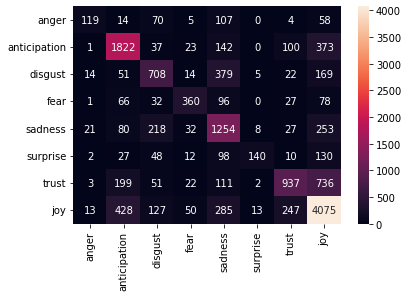

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, y_preds)
f = sns.heatmap(cm, annot=True, fmt='d', xticklabels=my_tags, yticklabels=my_tags)

## Export predicted emotion on test set

In [20]:
test_preds_output = trainer.predict(ds_encoded["test"])

The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: tweet_id, text. If tweet_id, text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 411972
  Batch size = 64


In [21]:
test_preds_output.predictions

array([[-2.611287  ,  4.677532  , -3.0203867 , ..., -2.1391318 ,
         3.259786  ,  2.0630746 ],
       [-2.9985397 ,  3.6891515 , -2.6970954 , ..., -2.8619285 ,
         5.086477  ,  1.4623197 ],
       [-1.8206109 ,  1.6601292 , -1.1218021 , ..., -1.0618868 ,
         1.2398455 ,  2.0929155 ],
       ...,
       [ 0.12106866, -0.2836612 ,  0.7927554 , ..., -1.3480296 ,
        -1.3492684 , -0.10415401],
       [-0.46141517,  0.26957873, -0.81142694, ..., -1.8322265 ,
         1.7168795 ,  2.3587942 ],
       [ 1.3848271 ,  0.06098024,  0.8031817 , ..., -0.79686   ,
        -2.1403737 , -1.5434688 ]], dtype=float32)

In [22]:
import numpy as np

test_pred = np.argmax(test_preds_output.predictions, axis=1).tolist()

In [23]:
test_pred_str = [ClassLabels.int2str(label) for label in test_pred]

In [24]:
df_test = ds_encoded["test"].to_pandas()

In [25]:
df_test['emotion_pred'] = test_pred_str

In [26]:
df_test

,tweet_id,text,input_ids,token_type_ids,attention_mask,emotion_pred
0,0x28b412,"Confident of your obedience, I write to you, k...","[101, 9657, 1997, 2115, 22645, 1010, 1045, 433...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",anticipation
1,0x2de201,"""Trust is not the same as faith. A friend is s...","[101, 1000, 3404, 2003, 2025, 1996, 2168, 2004...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",trust
2,0x218443,When do you have enough ? When are you satisfi...,"[101, 2043, 2079, 2017, 2031, 2438, 1029, 2043...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",joy
3,0x2939d5,"God woke you up, now chase the day #GodsPlan #...","[101, 2643, 8271, 2017, 2039, 1010, 2085, 5252...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",anticipation
4,0x26289a,"In these tough times, who do YOU turn to as yo...","[101, 1999, 2122, 7823, 2335, 1010, 2040, 2079...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",trust
...,...,...,...,...,...,...
411967,0x2913b4,"""For this is the message that ye heard from th...","[101, 1000, 2005, 2023, 2003, 1996, 4471, 2008...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",anticipation
411968,0x2a980e,"""There is a lad here, which hath five barley l...","[101, 1000, 2045, 2003, 1037, 14804, 2182, 101...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",anticipation
411969,0x316b80,When you buy the last 2 tickets remaining for ...,"[101, 2043, 2017, 4965, 1996, 2197, 1016, 9735...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",sadness
411970,0x29d0cb,I swear all this hard work gone pay off one da...,"[101, 1045, 8415, 2035, 2023, 2524, 2147, 2908...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",joy


In [27]:
df_test[['tweet_id', 'emotion_pred']].to_csv('prediction2.csv', index=False, header=['id', 'emotion'])